In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corrected-data/combined_user_data_corrected_impact_code.csv


****FINDING THE CORRELATION BETWEEN IMPACT_CODE AND EACH ATTRIBUTES

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/corrected-data/combined_user_data_corrected_impact_code.csv'  
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.head())
print(data.info())

   BirthYear  Female  Parkinsons  Tremors  DiagnosisYear  Sided_Left  \
0     1943.0       0           1        0         2007.0        True   
1     1953.0       0           1        1         2016.0       False   
2     1948.0       1           1        1         2014.0       False   
3        NaN       1           1        1         2012.0        True   
4     1934.0       1           1        1         2016.0        True   

   Sided_None  Sided_Right  UPDRS_1  UPDRS_2  ...  SL_Hold time  \
0       False        False    False    False  ...    147.364469   
1        True        False    False    False  ...     93.800000   
2       False         True    False    False  ...    140.022046   
3       False        False    False    False  ...    109.283360   
4       False        False    False    False  ...    140.830556   

   SL_Latency time  SL_Flight time  SR_Hold time  SR_Latency time  \
0       631.487088      458.537912    142.654396       584.639560   
1       207.000000      75

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**SIDED_LEFT**

In [33]:
# Check unique values and counts in Sided_Left
print(data['Sided_Left'].value_counts())

# Check unique values and counts in Impact_Code
print(data['Impact_Code'].value_counts())

Sided_Left
False    164
True      53
Name: count, dtype: int64
Impact_Code
3.0    70
2.0    67
4.0    56
1.0    24
Name: count, dtype: int64


In [34]:
# Create a contingency table
contingency_table = pd.crosstab(data['Sided_Left'], data['Impact_Code'])
print(contingency_table)

# Display proportions of each Impact_Code within each Sided_Left category
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_normalized)

Impact_Code  1.0  2.0  3.0  4.0
Sided_Left                     
False         20   43   47   54
True           4   24   23    2
Impact_Code       1.0       2.0       3.0       4.0
Sided_Left                                         
False        0.121951  0.262195  0.286585  0.329268
True         0.075472  0.452830  0.433962  0.037736


In [35]:
# Encode Sided_Left if needed
data['Sided_Left_numeric'] = data['Sided_Left'].astype(int)  # Convert True/False to 1/0

# Check correlation
correlation = data['Sided_Left_numeric'].corr(data['Impact_Code'])
print(f"Correlation between Sided_Left and Impact_Code: {correlation}")

Correlation between Sided_Left and Impact_Code: -0.17290542618031912


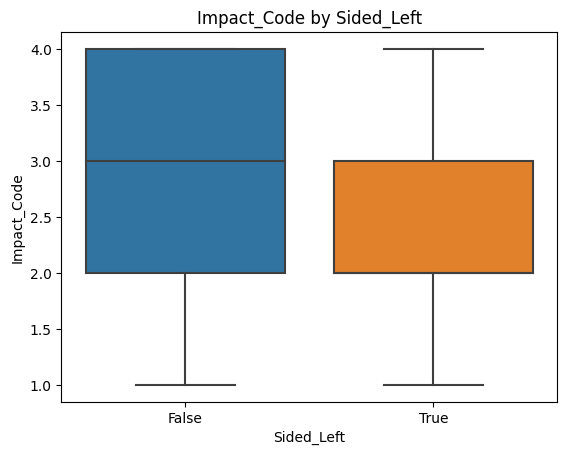

In [36]:
import seaborn as sns


# Boxplot to compare Impact_Code distribution based on Sided_Left
sns.boxplot(x='Sided_Left', y='Impact_Code', data=data)
plt.title("Impact_Code by Sided_Left")
plt.show()

**SIDED_RIGHT**

In [37]:
# Check unique values and counts in Sided_Left
print(data['Sided_Right'].value_counts())

# Check unique values and counts in Impact_Code
print(data['Impact_Code'].value_counts())

Sided_Right
False    157
True      60
Name: count, dtype: int64
Impact_Code
3.0    70
2.0    67
4.0    56
1.0    24
Name: count, dtype: int64


In [38]:
# Create a contingency table
contingency_table = pd.crosstab(data['Sided_Right'], data['Impact_Code'])
print(contingency_table)

# Display proportions of each Impact_Code within each Sided_Left category
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_normalized)

Impact_Code  1.0  2.0  3.0  4.0
Sided_Right                    
False         14   46   41   56
True          10   21   29    0
Impact_Code       1.0       2.0       3.0       4.0
Sided_Right                                        
False        0.089172  0.292994  0.261146  0.356688
True         0.166667  0.350000  0.483333  0.000000


In [39]:
# Encode Sided_Left if needed
data['Sided_Right_numeric'] = data['Sided_Right'].astype(int)  # Convert True/False to 1/0

# Check correlation
correlation = data['Sided_Right_numeric'].corr(data['Impact_Code'])
print(f"Correlation between Sided_Right and Impact_Code: {correlation}")

Correlation between Sided_Right and Impact_Code: -0.2630041968210217


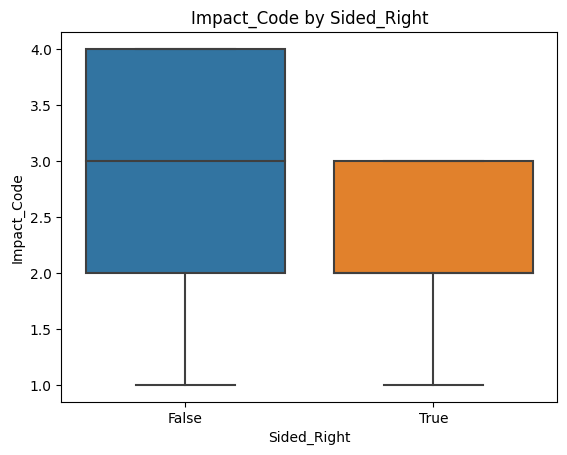

In [40]:
# Boxplot to compare Impact_Code distribution based on Sided_Left
sns.boxplot(x='Sided_Right', y='Impact_Code', data=data)
plt.title("Impact_Code by Sided_Right")
plt.show()

**UPDRS_1**

In [41]:
# Check unique values and counts in Sided_Left
print(data['UPDRS_1'].value_counts())

# Check unique values and counts in Impact_Code
print(data['Impact_Code'].value_counts())

UPDRS_1
False    216
True       1
Name: count, dtype: int64
Impact_Code
3.0    70
2.0    67
4.0    56
1.0    24
Name: count, dtype: int64


In [42]:
# Create a contingency table
contingency_table = pd.crosstab(data['UPDRS_1'], data['Impact_Code'])
print(contingency_table)

# Display proportions of each Impact_Code within each Sided_Left category
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_normalized)

Impact_Code  1.0  2.0  3.0  4.0
UPDRS_1                        
False         24   66   70   56
True           0    1    0    0
Impact_Code       1.0       2.0       3.0       4.0
UPDRS_1                                            
False        0.111111  0.305556  0.324074  0.259259
True         0.000000  1.000000  0.000000  0.000000


In [43]:
# Encode Sided_Left if needed
data['UPDRS_1_numeric'] = data['UPDRS_1'].astype(int)  # Convert True/False to 1/0

# Check correlation
correlation = data['UPDRS_1_numeric'].corr(data['Impact_Code'])
print(f"Correlation between UPDRS_1 and Impact_Code: {correlation}")

Correlation between UPDRS_1 and Impact_Code: -0.05122673719772922


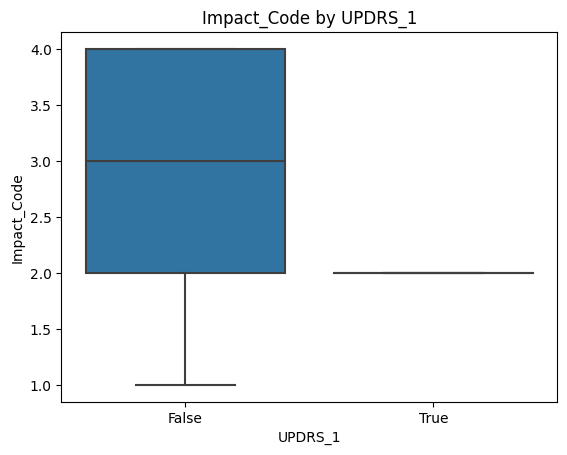

In [44]:
# Boxplot to compare Impact_Code distribution based on Sided_Left
sns.boxplot(x='UPDRS_1', y='Impact_Code', data=data)
plt.title("Impact_Code by UPDRS_1")
plt.show()

**UPDRS_2**

In [45]:
# Check unique values and counts in Sided_Left
print(data['UPDRS_2'].value_counts())

# Check unique values and counts in Impact_Code
print(data['Impact_Code'].value_counts())

UPDRS_2
False    215
True       2
Name: count, dtype: int64
Impact_Code
3.0    70
2.0    67
4.0    56
1.0    24
Name: count, dtype: int64


In [46]:
# Create a contingency table
contingency_table = pd.crosstab(data['UPDRS_2'], data['Impact_Code'])
print(contingency_table)

# Display proportions of each Impact_Code within each Sided_Left category
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_normalized)

Impact_Code  1.0  2.0  3.0  4.0
UPDRS_2                        
False         22   67   70   56
True           2    0    0    0
Impact_Code       1.0       2.0       3.0       4.0
UPDRS_2                                            
False        0.102326  0.311628  0.325581  0.260465
True         1.000000  0.000000  0.000000  0.000000


In [47]:
# Encode Sided_Left if needed
data['UPDRS_2_numeric'] = data['UPDRS_2'].astype(int)  # Convert True/False to 1/0
2# Check correlation
correlation = data['UPDRS_2_numeric'].corr(data['Impact_Code'])
print(f"Correlation between UPDRS_2 and Impact_Code: {correlation}")

Correlation between UPDRS_2 and Impact_Code: -0.17234294873229422


**UPDRS_3**

In [48]:
# Check unique values and counts in Sided_Left
print(data['UPDRS_3'].value_counts())

# Check unique values and counts in Impact_Code
print(data['Impact_Code'].value_counts())

UPDRS_3
False    214
True       3
Name: count, dtype: int64
Impact_Code
3.0    70
2.0    67
4.0    56
1.0    24
Name: count, dtype: int64


In [49]:
# Create a contingency table
contingency_table = pd.crosstab(data['UPDRS_3'], data['Impact_Code'])
print(contingency_table)

# Display proportions of each Impact_Code within each Sided_Left category
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_normalized)

Impact_Code  1.0  2.0  3.0  4.0
UPDRS_3                        
False         23   67   68   56
True           1    0    2    0
Impact_Code       1.0       2.0       3.0       4.0
UPDRS_3                                            
False        0.107477  0.313084  0.317757  0.261682
True         0.333333  0.000000  0.666667  0.000000


In [50]:
# Encode Sided_Left if needed
data['UPDRS_3_numeric'] = data['UPDRS_3'].astype(int)  # Convert True/False to 1/0
2# Check correlation
correlation = data['UPDRS_3_numeric'].corr(data['Impact_Code'])
print(f"Correlation between UPDRS_2 and Impact_Code: {correlation}")

Correlation between UPDRS_2 and Impact_Code: -0.04833170243694674


                     BirthYear        Female  Parkinsons   Tremors  \
BirthYear             1.000000  3.791134e-03   -0.171424  0.128759   
Female                0.003791  1.000000e+00    0.051232  0.330842   
Parkinsons           -0.171424  5.123155e-02    1.000000 -0.123490   
Tremors               0.128759  3.308420e-01   -0.123490  1.000000   
DiagnosisYear         0.007240 -1.147721e-01   -0.118019 -0.026520   
Sided_Left            0.128796  1.158807e-01   -0.226445  0.104582   
Sided_None           -0.080069 -8.277193e-02    0.104317 -0.132749   
Sided_Right          -0.046917 -3.187884e-02    0.117591  0.027120   
UPDRS_1              -0.049334  8.804509e-02    0.013532  0.070742   
UPDRS_2               0.040849  1.257675e-17    0.019212 -0.027570   
UPDRS_3               0.004778 -5.123155e-02    0.023622  0.018564   
UPDRS_4                    NaN           NaN         NaN       NaN   
UPDRS_Don't know     -0.006838 -1.043008e-17   -0.033808 -0.026569   
Impact_Medium       

<ipython-input-51-2d31fa5f79f4>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721

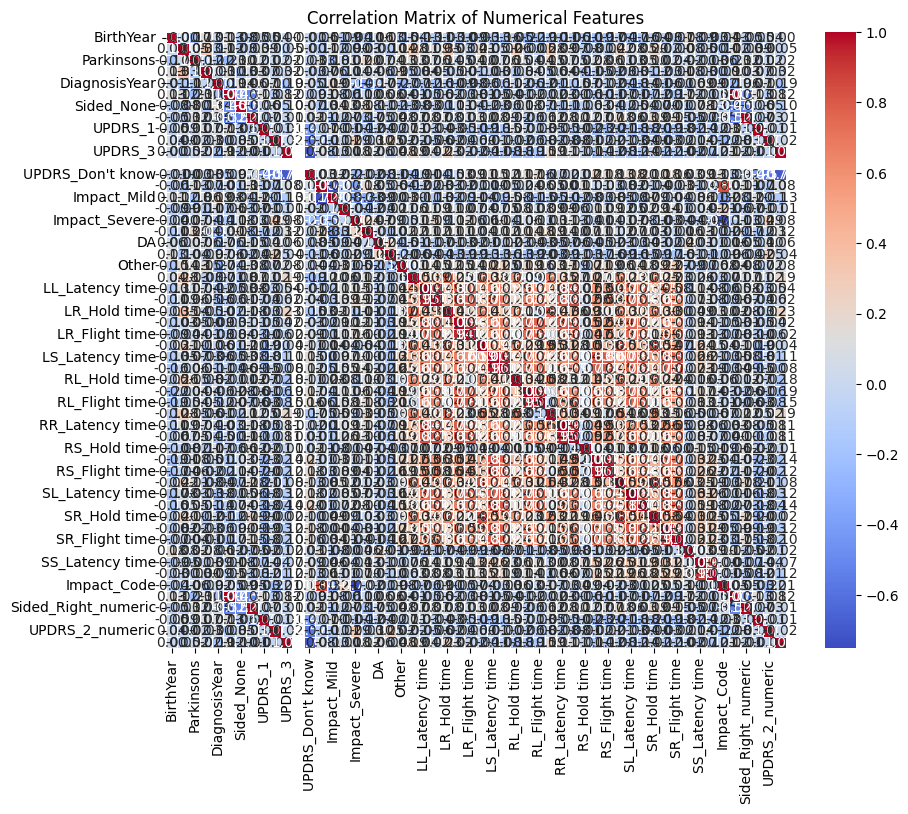

In [51]:
# Step 1: Checking for any missing values and handling them
# This step ensures there are no missing values which can affect correlation calculation
# Here, we drop rows with missing values; alternatively, you could use imputation if appropriate
data = data.dropna()  # Dropping rows with missing values
#Step 2: Convert TRUE/FALSE values to 1/0
# This ensures Boolean columns are treated as numerical values for correlation purposes
data = data.replace({True: 1, False: 0})
 # Step 3: Select only numerical columns for correlation analysis
# Correlation analysis is meaningful for numerical features, so we filter out non-numerical columns.
numerical_data = data.select_dtypes(include=['float64', 'int64'])
 #Step 4: Calculate the correlation matrix
# The correlation matrix gives the Pearson correlation coefficient for each pair of features.
correlation_matrix = numerical_data.corr()

# Display the correlation matrix to check values
print(correlation_matrix)
plt.figure(figsize=(10, 8))  # Set the size of the plot for better readability
# Using seaborn to plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Title for better context in the plot
plt.title('Correlation Matrix of Numerical Features')
 # Display the heatmap
plt.show()

REMOVAL OF OUTLIERS

DETECTION OF OUTLIERS

IQR METHOD TO DETECT OUTLIERS

In [53]:
import numpy as np
df = pd.read_csv(file_path)

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Z-score method to detect outliers (threshold |Z| > 3)
from scipy.stats import zscore

z_scores = np.abs(df[numerical_cols].apply(zscore))
outliers_zscore = (z_scores > 3)

# IQR method to detect outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))

# Combining both methods to get the final outliers
outliers_combined = outliers_zscore | outliers_iqr

# Filtering the rows with outliers
outlier_rows = df[outliers_combined.any(axis=1)]

# Show the number of detected outliers and sample rows
outlier_count = outlier_rows.shape[0]
outlier_count, outlier_rows.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 **

(102,
    BirthYear  Female  Parkinsons  Tremors  DiagnosisYear  Sided_Left  \
 0     1943.0       0           1        0         2007.0        True   
 1     1953.0       0           1        1         2016.0       False   
 2     1948.0       1           1        1         2014.0       False   
 3        NaN       1           1        1         2012.0        True   
 4     1934.0       1           1        1         2016.0        True   
 
    Sided_None  Sided_Right  UPDRS_1  UPDRS_2  ...  SL_Hold time  \
 0       False        False    False    False  ...    147.364469   
 1        True        False    False    False  ...     93.800000   
 2       False         True    False    False  ...    140.022046   
 3       False        False    False    False  ...    109.283360   
 4       False        False    False    False  ...    140.830556   
 
    SL_Latency time  SL_Flight time  SR_Hold time  SR_Latency time  \
 0       631.487088      458.537912    142.654396       584.639560   
 1  

In [54]:
# Removing outliers using IQR method
df_cleaned = df[~outliers_combined.any(axis=1)]

# Display the number of rows before and after removing outliers
original_count = df.shape[0]
cleaned_count = df_cleaned.shape[0]

original_count, cleaned_count

(217, 115)

FINDING CORRELATION AFTER REMOVAL OF OUTLIERS

In [55]:
# Compute correlation matrix for numerical columns
correlation_matrix = df_cleaned.corr()

# Extract correlation with Impact_Code and sort in descending order
impact_correlation = correlation_matrix["Impact_Code"].dropna().sort_values(ascending=False)

# Display the top correlations
impact_correlation

Impact_Code         1.000000
Impact_None         0.827281
Sided_None          0.506383
SL_Hold time        0.121182
RL_Hold time        0.114126
LL_Hold time        0.113645
RS_Hold time        0.097720
UPDRS_Don't know    0.095499
LL_Latency time     0.093969
LS_Hold time        0.092921
RR_Hold time        0.092919
SR_Latency time     0.091749
LL_Flight time      0.088112
RS_Flight time      0.085226
Impact_Medium       0.084457
SL_Latency time     0.078864
SL_Flight time      0.076357
RS_Latency time     0.064616
BirthYear           0.064099
LR_Hold time        0.062299
SR_Flight time      0.050271
SR_Hold time        0.038696
RL_Latency time     0.035436
RR_Latency time     0.033227
RR_Flight time      0.032732
LS_Latency time     0.026135
RL_Flight time      0.015724
UPDRS_3             0.012209
UPDRS_4             0.012209
Female             -0.001134
LR_Latency time    -0.029444
SS_Hold time       -0.044581
SS_Latency time    -0.045923
SS_Flight time     -0.050771
LS_Flight time

STATISTICAL METHODS

In [57]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/cleanedimputeddataset/cleaned_user_data_imputed.csv'
datafile = pd.read_csv(file_path)

PEARSON CORRELATION

In [58]:
# Compute Pearson correlation with the target variable "Impact_Code"
correlation_matrix = datafile.corr()
impact_correlations = correlation_matrix["Impact_Code"].dropna()

# Sort features by absolute correlation value in descending order
impact_correlations_sorted = impact_correlations.abs().sort_values(ascending=False)

# Display the top correlated features
impact_correlations_sorted

Impact_Code         1.000000
Impact_None         0.827281
Parkinsons          0.747552
Impact_Mild         0.647717
Impact_Severe       0.512036
Sided_None          0.506383
Tremors             0.497738
Levadopa            0.452562
Sided_Right         0.355386
Other               0.318500
Sided_Left          0.230923
UPDRS_2             0.188370
SL_Hold time        0.121182
RL_Hold time        0.114126
LL_Hold time        0.113645
RS_Hold time        0.097720
UPDRS_Don't know    0.095499
LL_Latency time     0.093969
LS_Hold time        0.092921
RR_Hold time        0.092919
SR_Latency time     0.091749
LL_Flight time      0.088112
LR_Flight time      0.085729
RS_Flight time      0.085226
Impact_Medium       0.084457
SL_Latency time     0.078864
SL_Flight time      0.076357
RS_Latency time     0.064616
LR_Hold time        0.062299
BirthYear           0.060661
DiagnosisYear       0.056092
LS_Flight time      0.051999
SS_Flight time      0.050771
SR_Flight time      0.050271
SS_Latency tim

**MEAN CALCULATION**

In [59]:
# Group by Impact_Code and compute the mean for each category
impact_means = datafile.groupby("Impact_Code").mean(numeric_only=True)

# Display the result
impact_means

,BirthYear,Female,Parkinsons,Tremors,DiagnosisYear,Sided_Left,Sided_None,Sided_Right,UPDRS_1,UPDRS_2,...,RS_Flight time,SL_Hold time,SL_Latency time,SL_Flight time,SR_Hold time,SR_Latency time,SR_Flight time,SS_Hold time,SS_Latency time,SS_Flight time
Impact_Code,,,,,,,,,,,,,,,,,,,,,
1.0,1944.657420,0.285714,1.000000,0.571429,2012.571429,0.142857,0.285714,0.571429,0.0,0.142857,...,204.729911,91.589609,319.319963,248.951592,90.118248,350.435742,295.434986,81.233369,188.435461,110.835278
2.0,1948.011021,0.567568,0.945946,0.648649,2013.756757,0.324324,0.324324,0.351351,0.0,0.000000,...,220.447381,115.679901,329.046355,259.851335,114.742324,357.791836,291.155444,99.555642,236.838699,152.027231
3.0,1946.894346,0.470588,1.000000,0.558824,2012.176471,0.294118,0.264706,0.441176,0.0,0.000000,...,241.764795,120.846998,349.737181,277.410840,118.279508,369.064124,291.357039,93.338156,229.371118,142.825784
4.0,1948.400157,0.486486,0.054054,0.000000,2013.081081,0.027027,0.972973,0.000000,0.0,0.000000,...,231.607822,117.674070,347.531015,272.928303,109.484793,383.172206,305.671796,88.962941,208.619549,129.573168


**MEDIAN AND STANDARD DEVIATION CALCULATION**

In [60]:
# Group by Impact_Code and compute median and standard deviation
impact_median = datafile.groupby("Impact_Code").median(numeric_only=True)
impact_std = datafile.groupby("Impact_Code").std(numeric_only=True)

# Display results
print("Median values by Impact Code:")
print(impact_median)
print("\nStandard Deviation values by Impact Code:")
print(impact_std)

Median values by Impact Code:
               BirthYear  Female  Parkinsons  Tremors  DiagnosisYear  \
Impact_Code                                                            
1.0          1944.000000     0.0         1.0      1.0         2013.0   
2.0          1947.601942     1.0         1.0      1.0         2016.0   
3.0          1947.601942     0.0         1.0      1.0         2013.0   
4.0          1948.000000     0.0         0.0      0.0         2013.0   

             Sided_Left  Sided_None  Sided_Right  UPDRS_1  UPDRS_2  ...  \
Impact_Code                                                         ...   
1.0                 0.0         0.0          1.0      0.0      0.0  ...   
2.0                 0.0         0.0          0.0      0.0      0.0  ...   
3.0                 0.0         0.0          0.0      0.0      0.0  ...   
4.0                 0.0         1.0          0.0      0.0      0.0  ...   

             RS_Flight time  SL_Hold time  SL_Latency time  SL_Flight time  \
Impact_C

SPEARMAN CORRELATION

In [61]:
# Compute Spearman correlation with the target variable "Impact_Code"
spearman_correlations = datafile.corr(method="spearman")["Impact_Code"].dropna()

# Sort features by absolute correlation value in descending order
spearman_correlations_sorted = spearman_correlations.abs().sort_values(ascending=False)

# Display the top correlated features
spearman_correlations_sorted

Impact_Code         1.000000
Impact_None         0.849436
Parkinsons          0.765846
Impact_Mild         0.696973
Sided_None          0.519080
Tremors             0.513233
Levadopa            0.459327
Impact_Severe       0.434754
Sided_Right         0.355592
Other               0.326904
DiagnosisYear       0.261472
Sided_Left          0.246313
UPDRS_2             0.159939
LL_Hold time        0.130356
RL_Hold time        0.127092
RR_Hold time        0.112066
SL_Hold time        0.104880
RS_Hold time        0.093502
BirthYear           0.089316
LR_Flight time      0.087086
LS_Hold time        0.082269
UPDRS_Don't know    0.081085
LR_Hold time        0.072959
Impact_Medium       0.071710
SS_Hold time        0.059654
LR_Latency time     0.058570
RS_Flight time      0.054846
SR_Hold time        0.049963
LL_Latency time     0.049884
LL_Flight time      0.048132
LS_Flight time      0.047142
SL_Latency time     0.040039
SL_Flight time      0.034957
SR_Latency time     0.034493
RL_Flight time

CLASSIFICATION

**NAIVE BAYES ALGORITHM**

In [62]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/cleanedimputeddataset/cleaned_user_data_imputed.csv'
data1= pd.read_csv(file_path)

# Display the first few rows and column information to understand the structure
data1.head(), data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BirthYear         115 non-null    float64
 1   Female            115 non-null    int64  
 2   Parkinsons        115 non-null    int64  
 3   Tremors           115 non-null    int64  
 4   DiagnosisYear     115 non-null    float64
 5   Sided_Left        115 non-null    bool   
 6   Sided_None        115 non-null    bool   
 7   Sided_Right       115 non-null    bool   
 8   UPDRS_1           115 non-null    bool   
 9   UPDRS_2           115 non-null    bool   
 10  UPDRS_3           115 non-null    bool   
 11  UPDRS_4           115 non-null    bool   
 12  UPDRS_Don't know  115 non-null    bool   
 13  Impact_Medium     115 non-null    bool   
 14  Impact_Mild       115 non-null    bool   
 15  Impact_None       115 non-null    bool   
 16  Impact_Severe     115 non-null    bool   
 1

(   BirthYear  Female  Parkinsons  Tremors  DiagnosisYear  Sided_Left  \
 0     1940.0       0           1        0         2009.0       False   
 1     1946.0       1           1        1         2015.0        True   
 2     1952.0       1           1        1         2010.0       False   
 3     1949.0       0           1        0         2015.0       False   
 4     1939.0       0           1        0         2010.0       False   
 
    Sided_None  Sided_Right  UPDRS_1  UPDRS_2  ...  SL_Hold time  \
 0        True        False    False    False  ...    110.069118   
 1       False        False    False    False  ...     90.863935   
 2        True        False    False    False  ...     94.111920   
 3        True        False    False    False  ...     78.485134   
 4       False         True    False    False  ...    151.560000   
 
    SL_Latency time  SL_Flight time  SR_Hold time  SR_Latency time  \
 0       274.275980      202.524755     88.991572       341.217236   
 1       1

In [63]:
# Selecting specified columns only
selected_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'SS_Hold time', 'LR_Hold time', 
    'Female', 'Tremors', 'Sided_None', 'LL_Flight time', 
    'RS_Hold time', 'MAOB', 'Other', 'LL_Latency time', 
    'Parkinsons', 'RL_Hold time', 'Impact_Code'
]

# Filter data with specified columns
filtered_data = data1[selected_columns]

# Check for missing values in the selected data
missing_info = filtered_data.isnull().sum()

filtered_data.head(), missing_info

(   Impact_Medium  Impact_Severe  Impact_Mild  Impact_None  UPDRS_2  \
 0          False           True        False        False    False   
 1          False          False         True        False    False   
 2           True          False        False        False    False   
 3           True          False        False        False    False   
 4           True          False        False        False    False   
 
    UPDRS_Don't know  SS_Hold time  LR_Hold time  Female  Tremors  Sided_None  \
 0              True    109.605588     93.983030       0        0        True   
 1              True     96.965826     84.052400       1        1       False   
 2              True     56.919786     99.977259       1        1        True   
 3              True     58.600000     72.207553       0        0        True   
 4              True      0.000000     96.161538       0        0       False   
 
    LL_Flight time  RS_Hold time  MAOB  Other  LL_Latency time  Parkinsons  \
 0    

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Convert boolean columns to integers (True=1, False=0) for compatibility
boolean_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'Sided_None'
]
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

# Define features and target
X = filtered_data.drop(columns='Impact_Code')
y = filtered_data['Impact_Code']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

<ipython-input-64-9735b03bdd1b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)


(1.0,
 '              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00         3\n         2.0       1.00      1.00      1.00         7\n         3.0       1.00      1.00      1.00         5\n         4.0       1.00      1.00      1.00         8\n\n    accuracy                           1.00        23\n   macro avg       1.00      1.00      1.00        23\nweighted avg       1.00      1.00      1.00        23\n')

SUPPORT VECTOR MACHINE

In [65]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Selecting specified columns
selected_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'SS_Hold time', 'LR_Hold time', 
    'Female', 'Tremors', 'Sided_None', 'LL_Flight time', 
    'RS_Hold time', 'MAOB', 'Other', 'LL_Latency time', 
    'Parkinsons', 'RL_Hold time', 'Impact_Code'
]

# Filter data with specified columns
filtered_data = data1[selected_columns]

# Convert boolean columns to integers (True=1, False=0)
boolean_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'Sided_None'
]
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

# Define features (X) and target (y)
X = filtered_data.drop(columns='Impact_Code')
y = filtered_data['Impact_Code']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Classifier with an RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Output the results
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n", report_svm)


Accuracy: 0.26
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.30      0.86      0.44         7
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         8

    accuracy                           0.26        23
   macro avg       0.07      0.21      0.11        23
weighted avg       0.09      0.26      0.14        23



<ipython-input-65-a0d9606cf50e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

**DECISION TREE**

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Selecting specified columns
selected_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'SS_Hold time', 'LR_Hold time', 
    'Female', 'Tremors', 'Sided_None', 'LL_Flight time', 
    'RS_Hold time', 'MAOB', 'Other', 'LL_Latency time', 
    'Parkinsons', 'RL_Hold time', 'Impact_Code'
]

# Filter data with specified columns
filtered_data = data1[selected_columns]

# Convert boolean columns to integers (True=1, False=0)
boolean_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'Sided_None'
]
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

# Define features (X) and target (y)
X = filtered_data.drop(columns='Impact_Code')
y = filtered_data['Impact_Code']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

# Output the results
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:\n", report_dt)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         7
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



<ipython-input-66-ac3b24935f8b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)


**K-NEAREST NEIGHBOUR**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Selecting specified columns
selected_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'SS_Hold time', 'LR_Hold time', 
    'Female', 'Tremors', 'Sided_None', 'LL_Flight time', 
    'RS_Hold time', 'MAOB', 'Other', 'LL_Latency time', 
    'Parkinsons', 'RL_Hold time', 'Impact_Code'
]

# Filter data with specified columns
filtered_data = data1[selected_columns]

# Convert boolean columns to integers (True=1, False=0)
boolean_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'Sided_None'
]
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

# Define features (X) and target (y)
X = filtered_data.drop(columns='Impact_Code')
y = filtered_data['Impact_Code']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
k = 5  # You can tune this parameter
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Output the results
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", report_knn)





Accuracy: 0.22
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.22      0.29      0.25         7
         3.0       0.10      0.20      0.13         5
         4.0       0.50      0.25      0.33         8

    accuracy                           0.22        23
   macro avg       0.21      0.18      0.18        23
weighted avg       0.26      0.22      0.22        23



<ipython-input-67-71d04ebfd24c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

**RANDOM FOREST**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Selecting specified columns
selected_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'SS_Hold time', 'LR_Hold time', 
    'Female', 'Tremors', 'Sided_None', 'LL_Flight time', 
    'RS_Hold time', 'MAOB', 'Other', 'LL_Latency time', 
    'Parkinsons', 'RL_Hold time', 'Impact_Code'
]

# Filter data with specified columns
filtered_data = data1[selected_columns]

# Convert boolean columns to integers (True=1, False=0)
boolean_columns = [
    'Impact_Medium', 'Impact_Severe', 'Impact_Mild', 'Impact_None', 
    'UPDRS_2', "UPDRS_Don't know", 'Sided_None'
]
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

# Define features (X) and target (y)
X = filtered_data.drop(columns='Impact_Code')
y = filtered_data['Impact_Code']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Output the results
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         7
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



<ipython-input-68-fe03a990a11e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)


In [69]:
# Extracting the relevant columns to determine disease severity
impact_columns = ["Impact_None", "Impact_Mild", "Impact_Medium", "Impact_Severe"]

# Check the distribution of impact categories
impact_distribution = data1[impact_columns].sum()

impact_distribution

Impact_None      37
Impact_Mild      37
Impact_Medium    34
Impact_Severe     7
dtype: int64

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define target variable
target_column = 'Impact_Severe'  # Replace with the actual column name for disease severity
X = data1.drop(columns=[target_column])
y = data1[target_column]

# Convert boolean columns to integers for compatibility with the imputer
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

# Step 2: Preprocess the data
# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers for pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Step 3: Create pipeline with RandomForest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Step 4: Define parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Step 5: Train model using GridSearchCV to find optimal parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Step 6: Display best parameters and model performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 7: Evaluate on a hold-out test set if available
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 0.9478260869565217
Test Set Evaluation:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        20
        True       0.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23

Accuracy: 0.8695652173913043


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
